In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set_style("whitegrid")
random.seed(17)

from scipy.stats import pearsonr
from scipy.spatial import distance
from matplotlib import style 
from collections import defaultdict
style.use('default')

# nltk libraries and sources
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag
import nltk
from nltk.corpus import brown, reuters, gutenberg
nltk.download('gutenberg')
nltk.download('reuters')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import sys
sys.path.append('../')
import utils.utils as utils
import utils.preprocessing as preprocessing

[nltk_data] Downloading package gutenberg to /Users/myra/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package reuters to /Users/myra/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package brown to /Users/myra/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/myra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/myra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/myra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/myra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/myra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger i

In [3]:
# Code for pretty plots
# https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib as mlp
label_text_color='#555555'
text_color="black"
accent_color="lightgrey"
sns.set(font="Franklin Gothic Book",
        rc={
 "axes.axisbelow": False,
 "axes.edgecolor": accent_color,
 "axes.facecolor": "None",
 "axes.grid": False,
 "axes.labelcolor": text_color,
 "axes.spines.right": False,
 "axes.spines.top": False,
 "figure.facecolor": "white",
 "lines.solid_capstyle": "round",
 "patch.edgecolor": "w",
 "patch.force_edgecolor": True,
 "text.color": text_color,
 "xtick.bottom": True,
 "xtick.color": accent_color,
 "xtick.labelcolor": label_text_color,
 "xtick.direction": "out",
 "xtick.labelsize": 18,
 "xtick.top": False,
 "ytick.color": label_text_color,
 "ytick.direction": "out",
 "ytick.left": False,
 "ytick.right": False})
sns.set_context("notebook", rc={"font.size":18,
                                "axes.titlesize":22,
                                "axes.labelsize":22})
tu_c1='#004E8A'
COLORS = ['#004E8A', '#FFE05C', '#F5A300', '#50B695', '#581845', '#E9503E', '#99C000', '#00715E', '#C9308E', '#6A8B22']

In [4]:
data_root_folder = "../data/"
stopwords_en = set(stopwords.words('english'))
output_dir = "../EmpDim/output/"

# Read data

In [5]:
data_train, data_dev = utils.load_data(data_root_folder)
articles = utils.load_articles()
# lower textual data
data_train['essay'] = data_train['essay'].apply(lambda x: x.lower())
articles['text'] = articles['text'].apply(lambda x: x.lower())

# tokenized version of the text
data_train = preprocessing.tokenize_data(data_train, 'essay')
articles = preprocessing.tokenize_data(articles, 'text')

# word lematizing
data_train = preprocessing.lemmatize_data(data_train, 'essay_tok')
articles = preprocessing.lemmatize_data(articles, 'text_tok')

In [6]:
empathy_lex, distress_lex = utils.load_empathy_distress_lexicon(data_root_folder="../data/")

# Analysis of PCA for empathy / distress dim

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


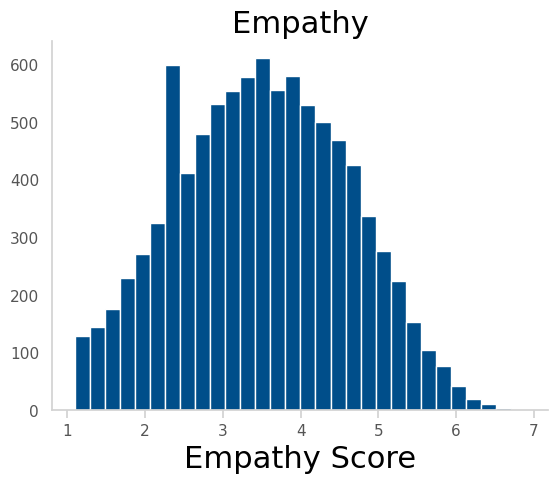

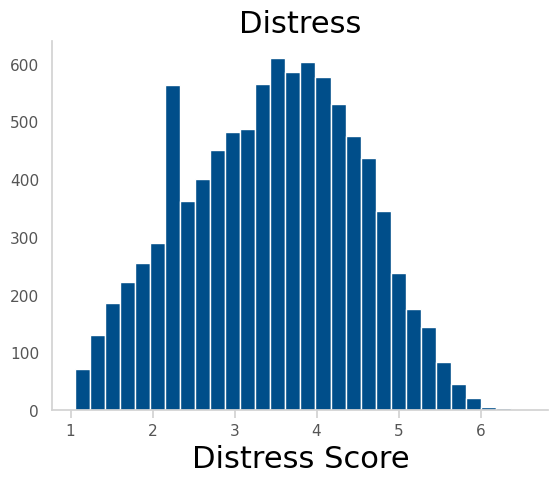

In [7]:
values = list(empathy_lex.values())
plt.hist(values, bins = 30, color=tu_c1)
plt.xlabel('Empathy Score') 
plt.title('Empathy')
plt.show()

values = list(distress_lex.values())
plt.hist(values, bins = 30, color=tu_c1)
plt.xlabel('Distress Score')
plt.title('Distress')
plt.show()

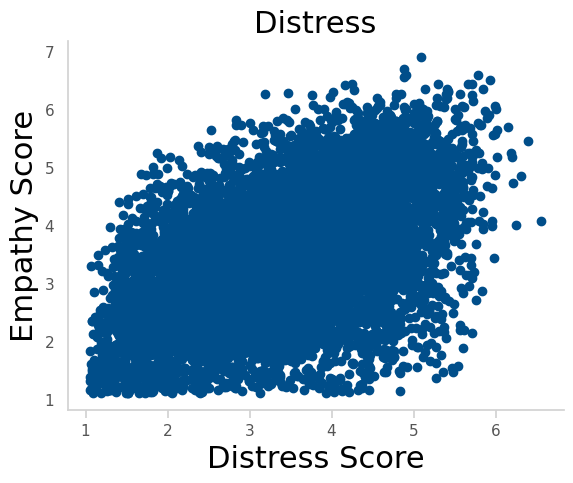

In [8]:
values_emp = list(empathy_lex.values())
values_dis = list(distress_lex.values())
plt.scatter(values_dis, values_emp, c=tu_c1)

plt.ylabel('Empathy Score')
plt.xlabel('Distress Score')
plt.title('Distress')
plt.show()

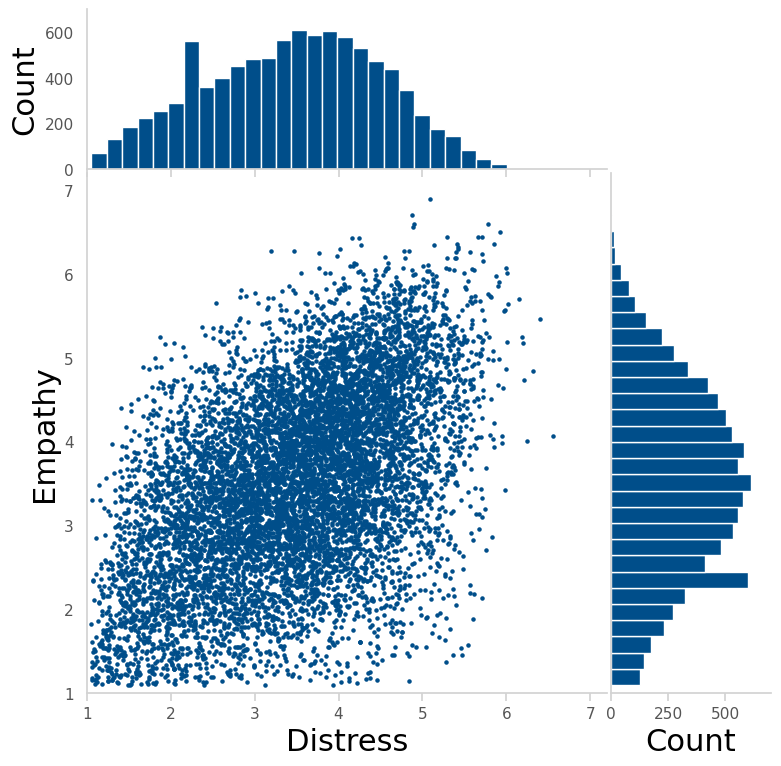

In [9]:
# source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, c=tu_c1, s=5)
    ax.set_ylim(1,7.2)
    ax.set_xlim(1,7.2)
    ax.set_ylabel('Empathy')
    ax.set_xlabel('Distress')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    markers = [0,200,400,600,800]
    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=30, color=tu_c1)
    ax_histx.set_ylim(0,700)
    #ax_histx.set_yticks(markers)
    #ax_histx.set_yticklabels(markers)
    ax_histx.set_ylabel('Count')

    ax_histy.hist(y, bins=30, orientation='horizontal', color=tu_c1)
    ax_histy.set_xlim(0,700)
    #ax_histx.set_xticks(markers)
    #ax_histx.set_xticklabels(markers)
    ax_histy.set_xlabel('Count')
    


left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(values_dis, values_emp, ax, ax_histx, ax_histy)
plt.savefig('../output/plots/lexical_scores.pdf')
plt.show()

In [10]:
print('\nEmpathy min scores')
sorted_empathy_dict_min = sorted(empathy_lex.items(), key=lambda item: item[1])
higher6 = [w for w, s in sorted_empathy_dict_min if s >= 6]
print(higher6)
len(higher6)


Empathy min scores
['symbolize', 'grief', 'paws', 'cubs', 'anchorage', 'afrikaans', 'distressed', 'habitat', 'burma', 'mansour', 'homes', 'tristan', 'salama', 'fairtrade', 'morphological', 'afghan', 'ethiopia', 'soul', 'empathy', 'rwanda', 'prayers', 'loss', 'methylmercury', 'trauma', 'blankets', 'janis', 'purification', 'journey', 'biodiversity', 'blisters', 'murchison', 'hardships', 'suffering', 'garcía', 'cancer', 'myanmar', 'uganda', 'heal', 'healer', 'grieving', 'scars', 'empathic', 'wounded', 'eagles', 'wounds', 'heartache', 'anscestors', 'glaciers', 'sorrow', 'willoughby', 'appalachia', 'tanzania', 'heartbreaking', 'empathize', 'shipwrecks', 'heartbreaks', 'duckworth', 'zambia', 'dubose', 'grieve', 'barakat', 'gaza', 'healing', 'lakota', 'lukemia']


65

In [11]:
print('\nEmpathy min scores')
sorted_empathy_dict_min = sorted(empathy_lex.items(), key=lambda item: item[1])
print(sorted_empathy_dict_min[:20])

print('\nEmpathy max scores')
sorted_empathy_dict_max = [(word, score) for word, score in sorted(empathy_lex.items(), key=lambda item: item[1], reverse=True)]
print(sorted_empathy_dict_max[:20])

print('\nDistress min scores')
sorted_distress_dict_min = [(word, score) for word, score in sorted(distress_lex.items(), key=lambda item: item[1])]
print(sorted_distress_dict_min[:20])

print('\nDistress max scores')
sorted_distress_dict_max = [(word, score) for word, score in sorted(distress_lex.items(), key=lambda item: item[1], reverse=True)]
print(sorted_distress_dict_max[:20])


Empathy min scores
[('joke', 1.09719309808247), ('worrying', 1.09822604212761), ('wacky', 1.09834762838549), ('bizarre', 1.09899483576479), ('stupidest', 1.10055367715272), ('pretending', 1.10592706513712), ('amusing', 1.1075202677636), ('fart', 1.10835499265131), ('fool', 1.10935816166989), ('gag', 1.11046663620353), ('except', 1.11331137250805), ('trades', 1.11520438106863), ('fake', 1.11851354344769), ('clown', 1.12048360110033), ('pretended', 1.12538681842619), ('bother', 1.12801179613834), ('dishonest', 1.12949620687347), ('anet', 1.12973836640722), ('slightest', 1.13014492297517), ('either', 1.13167908373534)]

Empathy max scores
[('lukemia', 6.89719309808247), ('lakota', 6.70043879862207), ('healing', 6.59682135519217), ('gaza', 6.59396010702993), ('barakat', 6.55846078878426), ('grieve', 6.5014269631434), ('dubose', 6.43950677509016), ('zambia', 6.43938359567666), ('duckworth', 6.43804711087136), ('heartbreaks', 6.43290793350761), ('shipwrecks', 6.42217383922169), ('empathize'

In [12]:
from nltk.stem import *
from nltk.stem.porter import *

def stem_words(words):
    """Stem words, capable of handling different types. words can either be
    of type str
    or type list(str)
    or type list((str, score))
    where the str object will be stemmed

    Args:
        words (list((str, float)) or list(str) or str): The words as described above

    Returns:
        list((str, float)) or list(str) or str: The stemmed words, returned in the same type as the input type
    """
    # words -> list of words
    # or words -> liste of tuples (list(str, float))
    # or words -> str
    stemmer = PorterStemmer()
    if isinstance(words, list):
        if isinstance(words[0], tuple):
            word_stems = [(stemmer.stem(w), score) for (w, score) in words]
        elif isinstance(words[0], str):
            word_stems = [stemmer.stem(w) for w in words]
        else:
            print('MyWarning in stem_words(): variable "words" should be a list of strings or list of tuples. Returning empty list.')
            word_stems = []
    elif isinstance(words, str):
        word_stems = stemmer.stem(words)
    else:
        print('MyWarning in stem_words(): variable "words" should be a list of strings or list of tuples. Returning empty list.')
        word_stems = []
    return word_stems


def remove_dublicates(words, sorting='max'):
    """Remove dublikates from a (sorted) list.

    Args:
        words (list((str, float)) or list(str)): The list of words
        sorting (str, optional): The sorting mechanism. Defaults to 'max'.

    Returns:
        _type_: _description_
    """
    # words -> liste of tuples (list(str, float))
    # the way to sort the scores (item[1])
    distinct_words = []
    if isinstance(words, list):
        if isinstance(words[0], tuple):
            # sort to make sure, we are returning the word with the highest/lowest value
            reverse = True if sorting=='max' else False
            sorted_words = [(word, score) for word, score in sorted(words, key=lambda item: item[1], reverse=reverse)]
            set_words = list(set([word for word, score in sorted_words]))
            for word, score in sorted_words:
                if word in set_words:
                    set_words.remove(word)
                    distinct_words.append((word, score))
        if isinstance(words[0], str):
            reverse = True if sorting=='max' else False
            set_words = list(set([word for word in words]))
            for word in words:
                if word in set_words:
                    set_words.remove(word)
                    distinct_words.append((word))

    return distinct_words


def get_verbs(words, blacklist=[]):
    """Get the words from a list

    Args:
        words (list((str, float)) or list(str)): The list of words

    Returns:
        list((str, float)) or list(str): The verbs
    """
    verbs = []
    if isinstance(words, list):
        if isinstance(words[0], tuple):
            for word, score in words:
                if word not in blacklist:
                    verb_synset_ls = wn.synsets(word, pos=wn.VERB)  # if a verb can be found in the list
                    if len(verb_synset_ls) >= 1:
                        #print(f'{word} is a verb (score: {score})\n Synset: {verb_synset_ls}\n')
                        verbs.append((word, score))
        if isinstance(words[0], str):
            for word in words:
                if word not in blacklist:
                    verb_synset_ls = wn.synsets(word, pos=wn.VERB)
                    if len(verb_synset_ls) >= 1:
                        verbs.append(word)

    return verbs

def select_words(lexicon, word_count):
    # return min and max sorted words with length of word_count
    blacklist = ['blanket', 'home', 'shipwreck', 'cub']
    def __get_words(sorting):
        reverse = True if sorting=='max' else False
        words_sorted = [(word, score) for word, score in sorted(lexicon.items(), key=lambda item: item[1], reverse=reverse)]
        word_stems = stem_words(words_sorted)
        distinct_word_stems = remove_dublicates(word_stems, sorting=sorting)
        distinct_verbs = get_verbs(distinct_word_stems, blacklist=blacklist)
        return distinct_verbs[:word_count]
    words_min = __get_words(sorting='min')
    words_max = __get_words(sorting='max')
    return words_min, words_max

dis_min, dis_max = select_words(distress_lex, 10)
print('dis_min:\n', dis_min)
print('dis_max:\n', dis_max)
emp_min, emp_max = select_words(empathy_lex, 10)
print('emp_min:\n', emp_min)
print('emp_max:\n', emp_max)

# TODO: Maybe look at lemmas in wordnet and see if one of them is a verb, if yes, take that. If not, don't take it
# for example blankets is not a verb in the lexicon with totally different meaning, but if we stem it and then do verb -> it is a verb but score is for a word with a totally different mean
# if nothing works, just manualy exlcude them

dis_min:
 [('guess', 1.05549069686362), ('hack', 1.05883270118414), ('chime', 1.06075113799987), ('interest', 1.07468670487951), ('except', 1.09226115405961), ('sort', 1.10965570859975), ('reason', 1.13866035355703), ('well', 1.14269635205938), ('stuff', 1.14522945508256), ('use', 1.16195525391104)]
dis_max:
 [('mistreat', 6.31178414562011), ('malnourish', 6.01796802838039), ('assault', 6.01273732117985), ('distress', 6.00846699078174), ('kill', 5.95793654260942), ('screech', 5.9534384145839), ('murder', 5.91287890035859), ('compass', 5.87626312442102), ('rape', 5.8375670680054), ('slaughter', 5.83686787143775)]
emp_min:
 [('joke', 1.09719309808247), ('pretend', 1.10592706513712), ('fart', 1.10835499265131), ('fool', 1.10935816166989), ('gag', 1.11046663620353), ('except', 1.11331137250805), ('trade', 1.11520438106863), ('fake', 1.11851354344769), ('clown', 1.12048360110033), ('bother', 1.12801179613834)]
emp_max:
 [('heal', 6.59682135519217), ('sorrow', 6.29975746152872), ('wound', 6.

# Get word frequency

In [13]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


corpus = reuters.words() + brown.words() + gutenberg.words()
fdist = FreqDist(word.lower() for word in corpus if word.isalnum())
fdist

FreqDist({'the': 272831, 'and': 149943, 'of': 144458, 'to': 110615, 'in': 84170, 'a': 82258, 'that': 46932, 'for': 42798, 'it': 42167, 'he': 40620, ...})

In [14]:
f"{fdist.freq('rape'):.10f}"


'0.0000042884'

In [15]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

# Select words from middle of data set
1. Get 'hard coded' middle
2. get middle based on the values for min / max we chose 

**Question**: Does it lead to better results if we have smaples on the whole range? Not only three clusters

# Select balanced scores from lexicon


Amount of subsampled data: 992


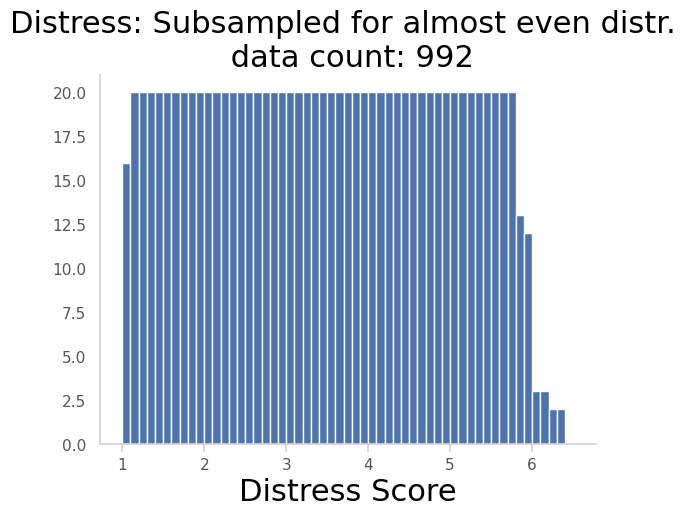

In [16]:
import decimal
import math
import random
random.seed(17)

def subsample_even_score_distr(lexicon, datapoints_per_bin, bin_size, return_binned_data=False, return_bins=False):
    """_summary_

    Args:
        lexicon (_type_): _description_
        datapoints_per_bin (_type_): _description_
        bin_size (_type_): _description_
        return_binned_data (bool, optional): If set to True, the data will be returned as a 
                                    two dimensional list, stored in ther bins. If false, a 
                                    one dimensional list will be returned. Defaults to False.
    """
    # - create list of tuples: list((str, float)) -
    words_sorted = [(word, score) for word, score in sorted(lexicon.items(), key=lambda item: item[1])]

    # - create bins -
    decimal_count = abs(decimal.Decimal(str(bin_size)).as_tuple().exponent)
    min_score = min([item[1] for item in words_sorted])
    max_score = max([item[1] for item in words_sorted])
    bins_start = math.floor(min_score * (10**decimal_count)) / (10**decimal_count)
    bins_end = math.ceil(max_score * (10**decimal_count)) / (10**decimal_count)
    # add the end point to the bins as well, to get the upper range for the elements
    # this will be removed later on, since it is not actually a bin
    bins = np.arange(bins_start, bins_end + bin_size, bin_size)

    # - divide data into bins - 
    binned_data = [[] for i in range(len(bins))]
    for word, score in words_sorted:
        min_idx = np.where(bins <= score)[0]
        max_idx = np.where(bins > score)[0] - 1
        item_bin_idx = np.intersect1d(min_idx, max_idx)[0]
        binned_data[item_bin_idx].append((word, score))
    # remove last bin, because it is 0 anyways, just needed it for the calculation
    binned_data = binned_data[:-1]
    bins = bins[:-1]

    # - shuffle the bins -
    for bin in binned_data:
        random.shuffle(bin)
        
    # - select data points from those bins of size <datapoints_per_bin> -
    binned_data = [bin[:datapoints_per_bin] for bin in binned_data]
    
    if return_binned_data:
        return binned_data if not return_bins else (binned_data, bins)

    unbinned_data = [item for bin in binned_data for item in bin]
    return unbinned_data if not return_bins else (unbinned_data, bins)


subsampled_lex, bins = subsample_even_score_distr(distress_lex, datapoints_per_bin=20, bin_size=0.1, return_bins=True)
print(f'Amount of subsampled data: {len(subsampled_lex)}')
values = list([score for word, score in subsampled_lex])
plt.hist(values, bins=bins)
plt.xlabel('Distress Score')
plt.title(f'Distress: Subsampled for almost even distr. \n data count: {len(values)}')
plt.show()

Amount of subsampled data: 756
56


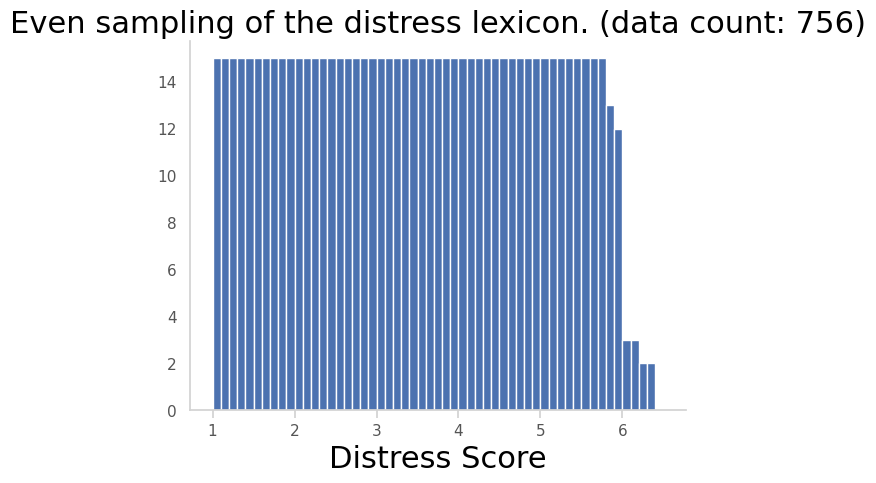

In [17]:

# even less daat points to make it more even
subsampled_lex, bins = subsample_even_score_distr(distress_lex, datapoints_per_bin=15, bin_size=0.1, return_bins=True)
print(f'Amount of subsampled data: {len(subsampled_lex)}')
values = list([score for word, score in subsampled_lex])
print(len(bins))
plt.hist(values, bins=bins)
plt.xlabel('Distress Score')
plt.title(f'Even sampling of the distress lexicon. (data count: {len(values)})')
plt.show()

Amount of subsampled data: 791
59


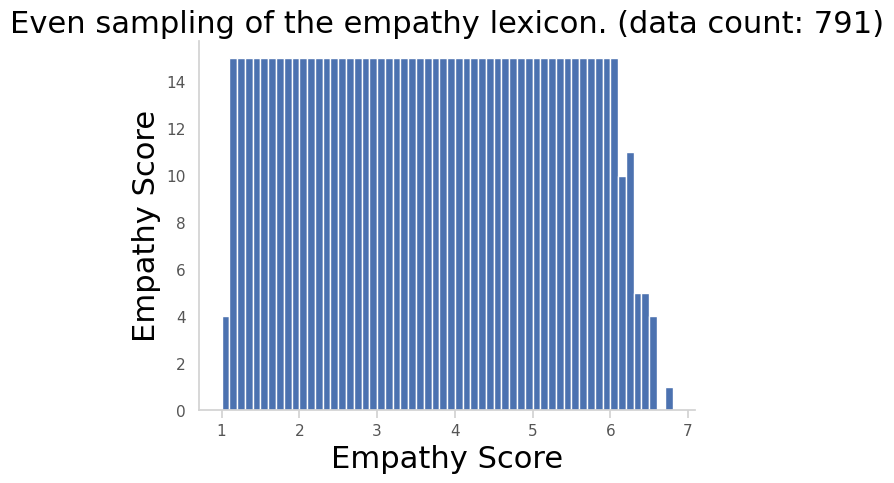

In [18]:
# even less daat points to make it more even
subsampled_lex, bins = subsample_even_score_distr(empathy_lex, datapoints_per_bin=15, bin_size=0.1, return_bins=True)
print(f'Amount of subsampled data: {len(subsampled_lex)}')
values = list([score for word, score in subsampled_lex])
print(len(bins))
plt.hist(values, bins=bins)
plt.ylabel('Empathy Score')
plt.xlabel('Empathy Score')
plt.title(f'Even sampling of the empathy lexicon. (data count: {len(values)})')
plt.title
plt.show()

In [19]:
subsampled_lex

[('worrying', 1.09822604212761),
 ('wacky', 1.09834762838549),
 ('bizarre', 1.09899483576479),
 ('joke', 1.09719309808247),
 ('trades', 1.11520438106863),
 ('pretend', 1.18855956157927),
 ('laughable', 1.13901225364122),
 ('embarrassing', 1.14887363276779),
 ('ridiculous', 1.15621151406376),
 ('pretended', 1.12538681842619),
 ('anything', 1.18825635366757),
 ('pretending', 1.10592706513712),
 ('either', 1.13167908373534),
 ('bunch', 1.19390038841652),
 ('dare', 1.19459232588743),
 ('flopping', 1.19083651989832),
 ('sane', 1.13776140111541),
 ('pro', 1.13420933707613),
 ('stupidest', 1.10055367715272),
 ('stupidity', 1.21331294744192),
 ('longer', 1.24390185077641),
 ('unless', 1.28822935500638),
 ('reasonable', 1.25991670630712),
 ('idiots', 1.27845460622785),
 ('posing', 1.2066363333623),
 ('legitimate', 1.2286613129955),
 ('paranoid', 1.29842555263713),
 ('fine', 1.28251213342388),
 ('morons', 1.25432226572524),
 ('strangest', 1.20278877060013),
 ('idiot', 1.2665736064773),
 ('reason

### Original histogram of the scores for comparison

Amount of subsampled data: 9356


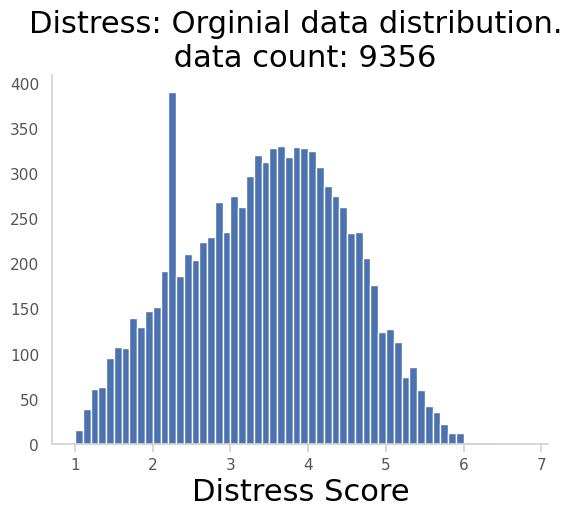

In [20]:
values = list(distress_lex.values())
print(f'Amount of subsampled data: {len(values)}')
plt.hist(values, bins=bins)
plt.xlabel('Distress Score')
plt.title(f'Distress: Orginial data distribution. \n data count: {len(values)}')
plt.show()

In [21]:
input = [('test', 5.5), ('cake', 4.3)]
[(word, score) for word, score in sorted(input, key=lambda item: item[1])]

[('cake', 4.3), ('test', 5.5)]

In [22]:
print('correlate for even subsamples')
even_subsamples = subsample_even_score_distr(distress_lex, datapoints_per_bin=20, bin_size=0.1, return_bins=False)
#print(even_subsamples)
sentences_input = [item[0] for item in even_subsamples]
#print(sentences_input[:10])
true_labels = [item[1] for item in even_subsamples]
#print(true_labels[:10])

correlate for even subsamples


# Analyse outcome

In [23]:
pca_outcome = pd.read_csv('../empdim_results_experiment.csv')
pca_outcome[:50]

,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
0,0,2022-06-06_102824,3,distress,1000,5,False,soft,NaN,1.0,all_words_rand,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.293861,0.225871,4.925691e-13
1,1,2022-06-06_102824,3,distress,1000,5,False,soft,NaN,1.0,all_words_rand,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,1,0.223853,0.064280,4.212581e-02
2,2,2022-06-06_102824,3,distress,1000,5,False,soft,NaN,1.0,all_words_rand,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,2,0.137043,-0.015687,6.202622e-01
3,0,2022-06-06_102824,3,distress,756,5,False,soft,NaN,1.0,all_words_even_15,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.293861,0.510175,2.468647e-51
4,1,2022-06-06_102824,3,distress,756,5,False,soft,NaN,1.0,all_words_even_15,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,1,0.223853,0.121537,8.121970e-04
5,2,2022-06-06_102824,3,distress,756,5,False,soft,NaN,1.0,all_words_even_15,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,2,0.137043,0.011966,7.425475e-01
6,0,2022-06-06_102824,3,distress,992,5,False,soft,NaN,1.0,all_words_even_20,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.293861,0.531319,2.340230e-73
7,1,2022-06-06_102824,3,distress,992,5,False,soft,NaN,1.0,all_words_even_20,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,1,0.223853,0.130823,3.580736e-05
8,2,2022-06-06_102824,3,distress,992,5,False,soft,NaN,1.0,all_words_even_20,False,0.00002,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,2,0.137043,-0.022662,4.758783e-01
9,0,2022-06-06_103049,3,distress,1000,10,False,soft,NaN,1.0,all_words_rand,False,0.00002,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.308225,0.274811,8.723424e-19


In [24]:
# functions
def max_abs(x):
    x_abs = x * np.sign(x)
    max_idx = x_abs.argmax()
    maximum = x.iloc()[max_idx]
    return maximum

In [25]:
idx = pca_outcome.groupby(['id', 'note'])['pca_pearsonr'].transform(lambda x: max(np.abs(x))) == np.abs(pca_outcome['pca_pearsonr'])
best_results = pca_outcome[idx]
best_results.loc[best_results.note == 'all_words_even_15']

,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
3,0,2022-06-06_102824,3,distress,756,5,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;kill;distress...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.293861,0.510175,2.468647e-51
12,0,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.308225,0.557377,6.352167e-63
21,0,2022-06-06_103303,3,distress,756,15,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.290193,-0.544012,1.874185e-59
30,0,2022-06-06_103524,3,distress,756,20,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.265652,-0.522372,3.722587e-54
39,0,2022-06-06_103738,3,distress,756,50,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.204278,0.469440,1.073018e-42
48,0,2022-06-06_104604,3,distress,756,5,False,soft,3.525099,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;flop;grass;tr...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.255829,-0.494772,6.258702e-48
57,0,2022-06-06_104821,3,distress,756,5,False,hard,3.803341,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;eat;insult;gr...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.248615,-0.515414,1.564857e-52
66,0,2022-06-06_105039,3,distress,756,10,False,soft,3.499412,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.268099,0.523901,1.617381e-54
75,0,2022-06-06_105253,3,distress,756,10,False,hard,3.803341,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.238716,0.517094,6.396647e-53
84,0,2022-06-06_105508,3,distress,756,15,False,soft,3.442147,1.0,all_words_even_15,False,0.000020,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.247600,0.470665,6.131250e-43


##### Best vocab length is 10

In [26]:
# what is the best length ---> 10
best_results.groupby(['note', 'vocab_size']).agg({'pca_pearsonr': max})


pca_pearsonr
note              vocab_size              
all_words_even_15 1               0.470221
                  2               0.430175
                  3               0.434948
                  5               0.510175
                  10              0.557377
                  15              0.473633
                  20              0.463347
                  50              0.477897
all_words_even_20 1               0.448353
                  2               0.414861
                  3               0.398444
                  5               0.531319
                  10              0.544123
                  15              0.510210
                  20              0.479764
                  50              0.451213
all_words_rand    1               0.264399
                  2               0.304896
                  3               0.281829
                  5               0.225871
                  10              0.274811
                  15              0.241754
                  20              0.273377
                  50              0.288676

In [27]:
0.5432 - 0.463347

0.07985300000000001

In [28]:
best_results.groupby(['note', 'vocab_size']).agg({'pca_pearsonr': max_abs})

pca_pearsonr
note              vocab_size              
all_words_even_15 1               0.470221
                  2               0.430175
                  3               0.434948
                  5              -0.515414
                  10             -0.570646
                  15             -0.544012
                  20             -0.522372
                  50              0.477897
all_words_even_20 1               0.448353
                  2               0.414861
                  3               0.398444
                  5               0.531319
                  10             -0.549217
                  15              0.510210
                  20              0.479764
                  50              0.451213
all_words_rand    1              -0.270916
                  2               0.304896
                  3               0.281829
                  5              -0.277155
                  10             -0.288441
                  15             -0.277907
                  20             -0.303261
                  50              0.288676

##### Best vocab_type is mm
##### Best correlation distribution is words even 15

In [29]:

best_results.groupby(['note', 'vocab_type']).agg({'pca_pearsonr': max_abs})

pca_pearsonr
note              vocab_type              
all_words_even_15 mm             -0.570646
                  mmn             0.523901
                  range           0.470221
all_words_even_20 mm             -0.549217
                  mmn             0.510210
                  range           0.448353
all_words_rand    mm             -0.303261
                  mmn             0.288676
                  range           0.304896

### Best model for each vocab type

In [30]:
best_results_15 = best_results.loc[(best_results.note == 'all_words_even_15')]
idx = best_results_15.groupby(['vocab_type'])['pca_pearsonr'].transform(max) == best_results_15['pca_pearsonr']
best_results_15[idx]


,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
12,0,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.00002,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.308225,0.557377,6.352167e-63
66,0,2022-06-06_105039,3,distress,756,10,False,soft,3.499412,1.0,all_words_even_15,False,0.00002,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.268099,0.523901,1.617381e-54
138,0,2022-06-06_112743,3,distress,756,1,False,soft,NaN,0.1,all_words_even_15,False,0.00002,range,guess;gripe;clue;type;case;falcon;correct;hija...,1.05549069686362;1.17744068559218;1.2623934568...,0,0.167842,0.470221,7.510738e-43


In [31]:
best_results_15 = best_results.loc[(best_results.note == 'all_words_even_15') & (best_results.vocab_type == 'mmn')]
idx = best_results_15.groupby(['vocab_center_strategy'])['pca_pearsonr'].transform(max) == best_results_15['pca_pearsonr']
best_results_15[idx]

,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
66,0,2022-06-06_105039,3,distress,756,10,False,soft,3.499412,1.0,all_words_even_15,False,0.00002,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.268099,0.523901,1.617381e-54
75,0,2022-06-06_105253,3,distress,756,10,False,hard,3.803341,1.0,all_words_even_15,False,0.00002,mmn,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.238716,0.517094,6.396647e-53


In [32]:
# different leixcon
best_results_15 = best_results.loc[best_results.note == 'all_words_even_15']
idx = best_results_15.groupby(['use_freq_dist'])['pca_pearsonr'].transform(max) == best_results_15['pca_pearsonr']
best_results_15[idx]['vocab_words']


12     guess;hack;chime;interest;except;sort;reason;w...
246    guess;interest;except;sort;reason;well;stuff;u...
Name: vocab_words, dtype: object

# Plot vocabulary

In [33]:
vocab = [('pipe', 1.77968560635602), ('suit', 1.47227748687615), ('hunch', 1.50766066516327), ('possess', 2.46739249130238), ('affect', 2.55366746135807), ('bud', 2.10790133516399), ('tick', 3.96827736629441), ('room', 3.97625900157487), ('cat', 3.42143991121306), ('spread', 4.45737586340529), ('assess', 4.15811746035681), ('defect', 4.34387243972072), ('picket', 5.20868869012816), ('sicken', 5.55851625097397), ('screech', 5.9534384145839), ('mistreat', 6.15267162558315), ('malnourish', 6.01796802838039)]
vocab

[('pipe', 1.77968560635602),
 ('suit', 1.47227748687615),
 ('hunch', 1.50766066516327),
 ('possess', 2.46739249130238),
 ('affect', 2.55366746135807),
 ('bud', 2.10790133516399),
 ('tick', 3.96827736629441),
 ('room', 3.97625900157487),
 ('cat', 3.42143991121306),
 ('spread', 4.45737586340529),
 ('assess', 4.15811746035681),
 ('defect', 4.34387243972072),
 ('picket', 5.20868869012816),
 ('sicken', 5.55851625097397),
 ('screech', 5.9534384145839),
 ('mistreat', 6.15267162558315),
 ('malnourish', 6.01796802838039)]

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


[0.12956674 0.64852587 0.58537788 0.02892642 0.2528126  0.31430223
 0.53656294 0.15063025 0.13540234 0.05795438 0.04770052 0.29678127
 0.07171518 0.09842793 0.57217462 0.5922635  0.15300265]


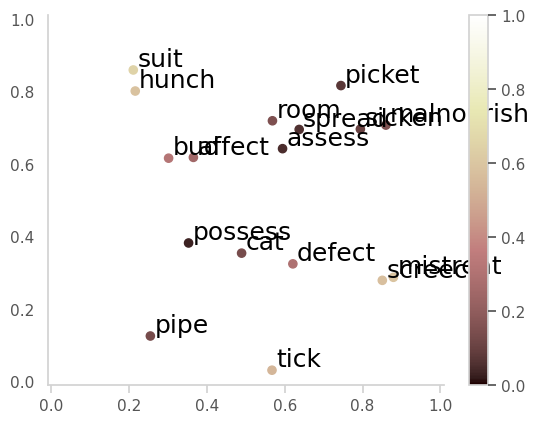

In [34]:
def scatter_vocab(vocab, y, colormap='pink'):
    offset = 0.01
    scores = [item[1] for item in vocab]
    scores = np.array(scores) / 7 # normaized scores
    words = [item[0] for item in vocab]

    cm = plt.cm.get_cmap(colormap)
    xy = range(20)
    z = xy
    dist = np.abs(scores - y)
    print(dist)
    sc = plt.scatter(scores, y, c=dist, vmin=0, vmax=1, s=35, cmap=cm)

    for i, word in enumerate(words):
        plt.annotate(word, (scores[i]+offset, y[i]+offset))

    plt.ylim(0-offset,1+offset)
    plt.xlim(0-offset,1+offset)

    # colorbar means übereinstimmung der scores
    plt.colorbar(sc)


random_y = np.array([random.uniform(0, 1) for y in range(len(vocab))])
scatter_vocab(vocab, random_y)

In [35]:
# Settings of vocabulary to correlate

runs = ['2022-06-07_064647', '2022-06-06_103049']
# show the results for them

runs_to_compare = pca_outcome.loc[pca_outcome.note == 'all_words_even_15']
runs_to_compare = runs_to_compare.loc[runs_to_compare.id.isin(runs)]
runs_to_compare

,Unnamed: 0,id,dim,task_name,data_len,vocab_size,random_vocab,vocab_center_strategy,center,vocab_bin_size,note,use_freq_dist,freq_thresh,vocab_type,vocab_words,vocab_scores,princip_comp,pca_var,pca_pearsonr,pca_pearsonp
12,0,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,0,0.308225,0.557377,6.352167e-63
13,1,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,1,0.131439,0.117632,1.194275e-03
14,2,2022-06-06_103049,3,distress,756,10,False,soft,NaN,1.0,all_words_even_15,False,0.000020,mm,guess;hack;chime;interest;except;sort;reason;w...,1.05549069686362;1.05883270118414;1.0607511379...,2,0.101153,0.024789,4.961425e-01
273,0,2022-06-07_064647,3,distress,756,10,False,soft,NaN,0.1,all_words_even_15,True,0.000005,mm,guess;interest;except;sort;reason;well;stuff;u...,1.05549069686362;1.07468670487951;1.0922611540...,0,0.295873,-0.570646,1.579475e-66
274,1,2022-06-07_064647,3,distress,756,10,False,soft,NaN,0.1,all_words_even_15,True,0.000005,mm,guess;interest;except;sort;reason;well;stuff;u...,1.05549069686362;1.07468670487951;1.0922611540...,1,0.127739,0.156673,1.508603e-05
275,2,2022-06-07_064647,3,distress,756,10,False,soft,NaN,0.1,all_words_even_15,True,0.000005,mm,guess;interest;except;sort;reason;well;stuff;u...,1.05549069686362;1.07468670487951;1.0922611540...,2,0.099072,-0.194087,7.494069e-08


# Load the final vocabulary

In [36]:
vocab_dis = pd.read_csv('../EmpDim/output/final_vocab_distress.csv', index_col=0)
vocab_emp = pd.read_csv('../EmpDim/output/final_vocab_empathy.csv', index_col=0)

In [37]:
vocab_dis

,word,label,ED/DD,PC2,PC3
0,bomb,5.659604,-7.319733,-2.804805,1.378330
1,well,1.142696,8.399685,1.062742,-0.444426
2,compass,5.876263,4.097374,-0.119135,8.539362
3,reason,1.138660,5.074312,-2.990174,2.362155
4,quit,1.181804,-2.292819,12.172923,-0.045631
5,murder,5.912879,-9.205488,1.275856,7.594149
6,slaughter,5.836868,-9.939608,1.094314,-0.650374
7,toll,5.690541,-0.102825,-0.471207,0.914945
8,stuff,1.145229,6.324498,-2.740313,-3.612832
9,kill,5.957937,-8.862613,-3.193830,4.487082


In [38]:
vocab_emp

,word,label,ED/DD,PC2,PC3
0,fell,5.909871,6.250515,0.930466,-3.082218
1,doubt,1.167219,4.993377,4.223365,-2.663383
2,journey,6.099534,-5.865872,-5.024131,2.927822
3,bother,1.128012,6.910979,-0.078451,3.052096
4,pose,1.206636,-7.053003,0.064080,0.457957
5,suffer,6.150593,8.169113,-2.136509,0.881118
6,distress,6.012959,6.610655,-3.303484,1.436642
7,sick,5.917092,9.563503,-3.408582,-0.600022
8,guess,1.175869,-5.878081,5.573399,-2.443207
9,wound,6.268003,0.034521,-5.896463,0.067199


# Plot vocabulary

In [39]:
color_dict = {0: '#99C000', 1: '#004E8A'}
#, '#F5A300', '#50B695', '#581845', '#E9503E', '#99C000', '#00715E', '#C9308E', '#6A8B22']

In [40]:
def scatter_vocab(words, label, direction, random_y):
    offset = 0.01

    direction = np.array(direction)
    random_y = np.array(random_y)
    #label = label / 7
    
    plt.figure(figsize=(10, 8))
    z = np.array([0 if l<3.5 else 1 for l in label])
    label_dict = {0: 'Low Score', 1: 'High Score'}
    for g in np.unique(z):
        ix = np.where(z == g)
        sc = plt.scatter(direction[ix], random_y[ix], c=color_dict[g], vmin=0, vmax=1, s=50, label=label_dict[g]) #color=tu_c1)#
    plt.legend()
    plt.xlabel('ED/DD')
    plt.ylabel('')

    plt.yticks([])

    plt.title('Vocabulary for the distress direction')
    for i, word in enumerate(words):
        plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))

In [ ]:

def scatter_vocabulary(vocab, random_y, task_name_label, x_label):
    #random_y = np.array([random.uniform(0, 10) for y in range(len(vocab_dis['word']))])
    #print(random_y)
    #random_y = [0.33574357, 3.58720877, 9.27859456, 4.49185253, 4.25034563,
    #       7.06088956, 2.15916911, 2.66853751, 2.57420019, 8.8056118 ,
    #       3.09762615, 5.44368552, 6.3241829 , 8.0575968 , 7.87125867,
    #       9.47585225, 1.33199692, 9.65403634, 0.37361503, 7.31531344]
    #print(vocab_dis['word'])

    direction = vocab['ED/DD']
    label = vocab['label']
    words = vocab['word']
    offset = 0.01

    direction = np.array(direction)
    random_y = np.array(random_y)
    #label = label / 7

    plt.figure(figsize=(8, 5))
    z = np.array([0 if l<3.5 else 1 for l in label])
    label_dict = {0: f'Low {task_name_label} Score', 1: f'High {task_name_label} Score'}
    for g in np.unique(z):
        ix = np.where(z == g)
        sc = plt.scatter(direction[ix], random_y[ix], c=color_dict[g], alpha=0.7, vmin=0, vmax=1, s=50, label=label_dict[g]) #color=tu_c1)#
    plt.legend(loc='center',bbox_to_anchor=(0.5, 1.1), prop={'size': 14})
    plt.xlabel(x_label)
    plt.ylabel('')

    plt.yticks([])

    plt.title('task_name_label Vocabulary for PC 1', pad=70)
    for i, word in enumerate(words):
        plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))
    plt.savefig(f'{output_dir}/project_vocab_PC1_{task_name_label}.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)

[7.01150784 4.97466309 9.47581254 2.36135879 4.78179914 2.76374254
 2.42962842 4.74298219 2.78594161 3.25493395 1.2442322  5.87095835
 0.39635984 6.21344837 2.43341463 5.76923384 1.43600878 6.0604904
 5.40441638 7.64870008]
0          bomb
1          well
2       compass
3        reason
4          quit
5        murder
6     slaughter
7          toll
8         stuff
9          kill
10       scream
11      assault
12     interest
13     distress
14       except
15       suffer
16          use
17         fine
18        guess
19         sort
Name: word, dtype: object


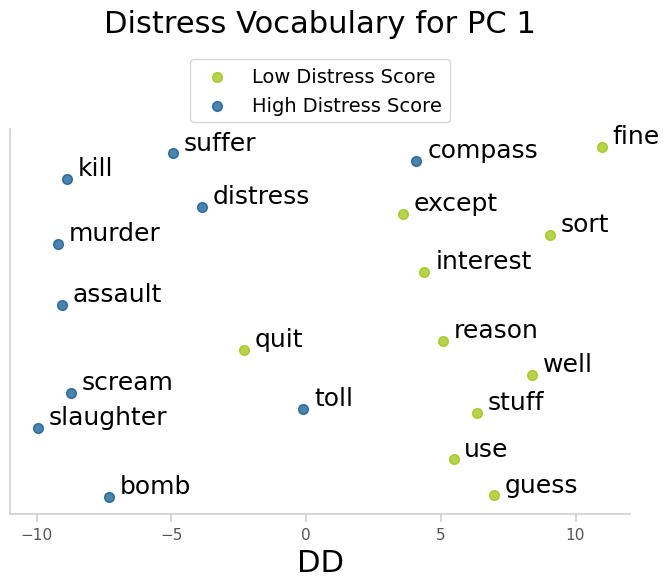

In [51]:

random_y = np.array([random.uniform(0, 10) for y in range(len(vocab_dis['word']))])
print(random_y)
random_y = [0.33574357, 3.58720877, 9.27859456, 4.49185253, 4.25034563,
       7.06088956, 2.15916911, 2.66853751, 2.57420019, 8.8056118 ,
       3.09762615, 5.44368552, 6.3241829 , 8.0575968 , 7.87125867,
       9.47585225, 1.33199692, 9.65403634, 0.37361503, 7.31531344]
print(vocab_dis['word'])

direction = vocab_dis['ED/DD']
label = vocab_dis['label']
words = vocab_dis['word']
offset = 0.01

direction = np.array(direction)
random_y = np.array(random_y)
#label = label / 7

plt.figure(figsize=(8, 5))
z = np.array([0 if l<3.5 else 1 for l in label])
label_dict = {0: 'Low Distress Score', 1: 'High Distress Score'}
for g in np.unique(z):
       ix = np.where(z == g)
       sc = plt.scatter(direction[ix], random_y[ix], c=color_dict[g], alpha=0.7, vmin=0, vmax=1, s=50, label=label_dict[g]) #color=tu_c1)#
plt.legend(loc='center',bbox_to_anchor=(0.5, 1.1), prop={'size': 14})
plt.xlabel('DD')
plt.ylabel('')

plt.yticks([])

plt.title('Distress Vocabulary for PC 1', pad=70)
for i, word in enumerate(words):
       plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))
plt.savefig(f'{output_dir}/project_vocab_PC1_distress.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)


[4.83116072 8.98446165 5.38261672 7.67129671 4.80880065 5.36316854
 5.77849235 6.50865124 4.90060103 3.80908552 5.49207018 3.92425715
 7.80031673 6.88215101 7.38592872 9.90196005 3.23537074 7.5379313
 4.52398179 7.5379508 ]
0          bomb
1          well
2       compass
3        reason
4          quit
5        murder
6     slaughter
7          toll
8         stuff
9          kill
10       scream
11      assault
12     interest
13     distress
14       except
15       suffer
16          use
17         fine
18        guess
19         sort
Name: word, dtype: object


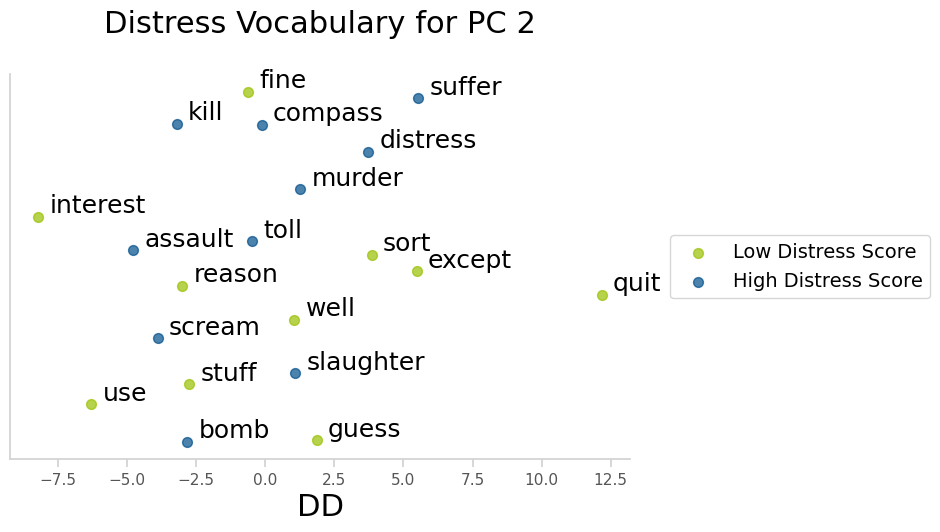

In [52]:

random_y = np.array([random.uniform(0, 10) for y in range(len(vocab_dis['word']))])
print(random_y)
random_y = [0.33574357, 3.58720877, 8.77859456, 4.49185253, 4.25034563,
       7.06088956, 2.15916911, 5.66853751, 1.87420019, 8.8056118 ,
       3.09762615, 5.44368552, 6.3241829 , 8.0575968 , 4.87125867,
       9.47585225, 1.33199692, 9.65403634, 0.37361503, 5.31531344]
print(vocab_dis['word'])


direction = vocab_dis['PC2']
label = vocab_dis['label']
words = vocab_dis['word']
offset = 0.01

direction = np.array(direction)
random_y = np.array(random_y)
#label = label / 7

plt.figure(figsize=(8, 5))
z = np.array([0 if l<3.5 else 1 for l in label])
label_dict = {0: 'Low Distress Score', 1: 'High Distress Score'}
for g in np.unique(z):
       ix = np.where(z == g)
       sc = plt.scatter(direction[ix], random_y[ix], c=color_dict[g], alpha=0.7, vmin=0, vmax=1, s=50, label=label_dict[g]) #color=tu_c1)#
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), prop={'size': 14})
plt.xlabel('DD')
plt.ylabel('')

plt.yticks([])

plt.title('Distress Vocabulary for PC 2', pad=30)
for i, word in enumerate(words):
       plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))
plt.savefig(f'{output_dir}/project_vocab_PC2_distress_.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)


[9.76942262 4.67205484 9.48376096 2.92564109 8.45855224 3.77060037
 4.64841699 0.06753186 5.72677586 3.04248687 5.46281495 2.79367432
 9.01150869 3.2601389  9.43310175 4.81404374 9.52700421 8.45957795
 2.75315359 8.27484729]
0         fell
1        doubt
2      journey
3       bother
4         pose
5       suffer
6     distress
7         sick
8        guess
9        wound
10     compass
11        heal
12        fool
13      sorrow
14      except
15         paw
16       bunch
17        dare
18     pretend
19       trade
Name: word, dtype: object


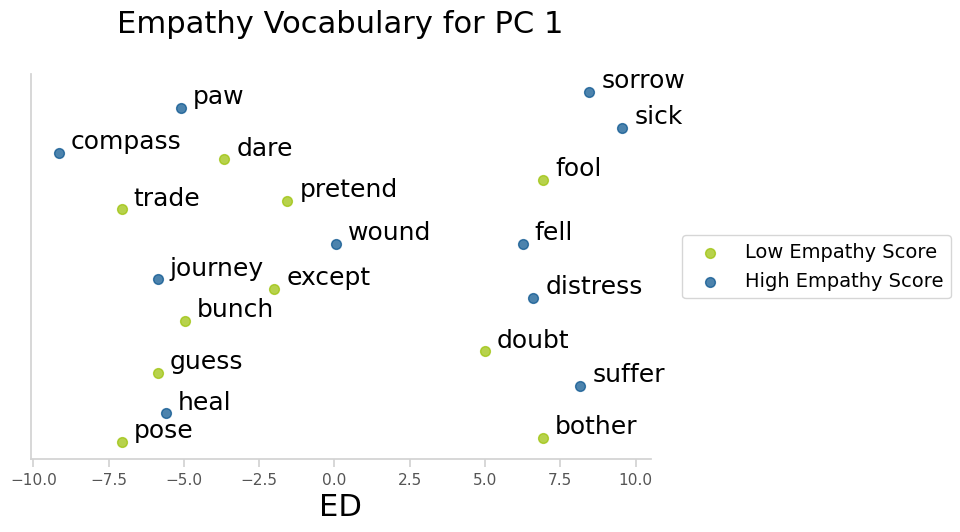

In [ ]:
random_y = np.array([random.uniform(0, 10) for y in range(len(vocab_dis['word']))])
print(random_y)
random_y = [5.39866097, 2.75544358, 4.52912977, 0.63039245, 0.53329465,
       1.91336996, 4.07494531, 8.26598285, 2.23580316, 5.40860681,
       7.65129481, 1.23552409, 6.97873003, 9.15086184, 4.29958708,
       8.74735676, 3.51188576, 7.48474621, 6.46794862, 6.25285159]
print(vocab_emp['word'])

direction = vocab_emp['ED/DD']
label = vocab_emp['label']
words = vocab_emp['word']
offset = 0.01

direction = np.array(direction)
random_y = np.array(random_y)
#label = label / 7

plt.figure(figsize=(8, 5))
z = np.array([0 if l<3.5 else 1 for l in label])
label_dict = {0: 'Low Empathy Score', 1: 'High Empathy Score'}
for g in np.unique(z):
       ix = np.where(z == g)
       sc = plt.scatter(direction[ix], random_y[ix], c=color_dict[g], alpha=0.7, vmin=0, vmax=1, s=50, label=label_dict[g]) #color=tu_c1)#
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), prop={'size': 14})
plt.xlabel('ED')
plt.ylabel('')

plt.yticks([])

plt.title('Empathy Vocabulary for PC 1', pad=30)
for i, word in enumerate(words):
       plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))
plt.savefig(f'{output_dir}/project_vocab_PC1_empathy_.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)

In [ ]:
random_y = np.array([random.uniform(0, 10) for y in range(len(vocab_emp['word']))])
print(random_y)
random_y

[3.74893043 6.09370135 4.9382289  6.42201756 3.40019211 9.54402164
 8.35105652 4.17542367 4.68018017 4.98489332 0.1538533  8.35719347
 7.63456623 4.51573082 2.97492666 1.87843619 6.63509058 7.5388865
 5.16308902 2.03664238]


array([3.74893043, 6.09370135, 4.9382289 , 6.42201756, 3.40019211,
       9.54402164, 8.35105652, 4.17542367, 4.68018017, 4.98489332,
       0.1538533 , 8.35719347, 7.63456623, 4.51573082, 2.97492666,
       1.87843619, 6.63509058, 7.5388865 , 5.16308902, 2.03664238])

0         fell
1        doubt
2      journey
3       bother
4         pose
5       suffer
6     distress
7         sick
8        guess
9        wound
10     compass
11        heal
12        fool
13      sorrow
14      except
15         paw
16       bunch
17        dare
18     pretend
19       trade
Name: word, dtype: object


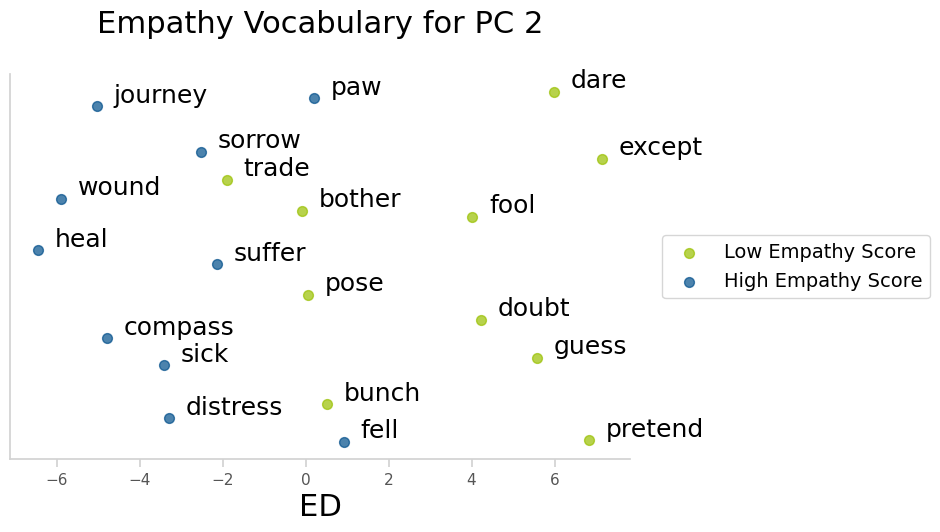

In [ ]:
random_y = [0.33574357, 3.58720877, 9.27859456, 6.49185253, 4.25034563,
       5.06088956, 0.95916911, 2.36853751, 2.57420019, 6.8056118 ,
       3.09762615, 5.44368552, 6.3241829 , 8.0575968 , 7.87125867,
       9.47585225, 1.33199692, 9.65403634, 0.37361503, 7.31531344]
print(vocab_emp['word'])

direction = vocab_emp['PC2']
label = vocab_emp['label']
words = vocab_emp['word']
offset = 0.01

direction = np.array(direction)
random_y = np.array(random_y)
#label = label / 7

plt.figure(figsize=(8, 5))
z = np.array([0 if l<3.5 else 1 for l in label])
label_dict = {0: 'Low Empathy Score', 1: 'High Empathy Score'}
for g in np.unique(z):
       ix = np.where(z == g)
       sc = plt.scatter(direction[ix], random_y[ix], c=color_dict[g], alpha=0.7, vmin=0, vmax=1, s=50, label=label_dict[g]) #color=tu_c1)#
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), prop={'size': 14})
plt.xlabel('ED')
plt.ylabel('')

plt.yticks([])

plt.title('Empathy Vocabulary for PC 2', pad=30)
for i, word in enumerate(words):
       plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))
plt.savefig(f'{output_dir}/project_vocab_PC2_empathy_.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)

[4.7630647  0.18867212 3.44119273 9.53990513 3.09732887 5.01783393
 1.54791913 8.43969301 3.27729221 0.32527198 4.84678167 7.93607402
 4.71934328 4.24542613 6.53546358 7.58883499 4.75230485 5.62390031
 2.74477881 4.78702546]
0         fell
1        doubt
2      journey
3       bother
4         pose
5       suffer
6     distress
7         sick
8        guess
9        wound
10     compass
11        heal
12        fool
13      sorrow
14      except
15         paw
16       bunch
17        dare
18     pretend
19       trade
Name: word, dtype: object


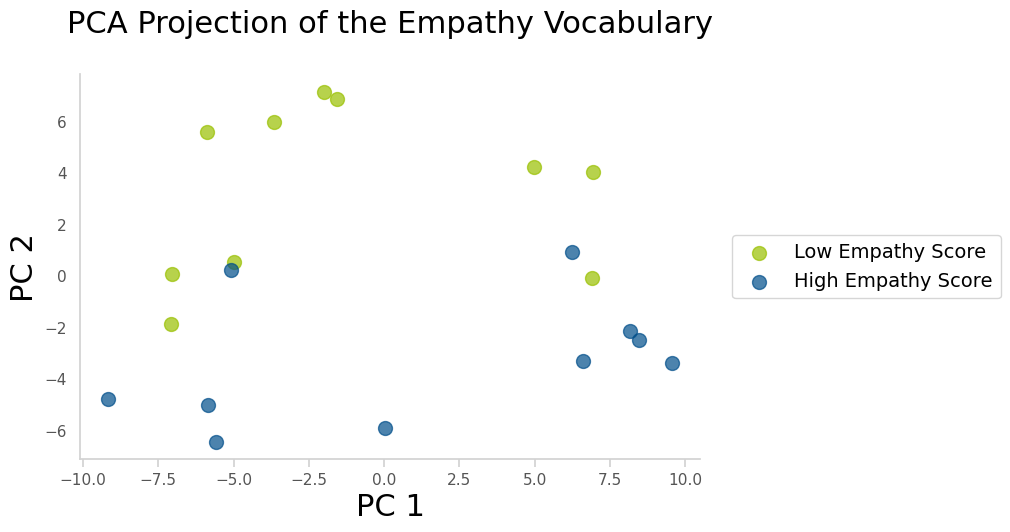

In [ ]:
# Empathy PC 1 and 2

random_y = np.array([random.uniform(0, 10) for y in range(len(vocab_dis['word']))])
print(random_y)
random_y = [5.39866097, 3.75544358, 4.52912977, 3.63039245, 1.13329465,
       3.91336996, 4.07494531, 8.26598285, 1.93580316, 5.40860681,
       7.65129481, 1.93552409, 6.97873003, 9.15086184, 4.29958708,
       8.74735676, 3.51188576, 3.48474621, 6.46794862, 6.25285159]
print(vocab_emp['word'])

direction = vocab_emp['ED/DD']
random_y = vocab_emp['PC2']
label = vocab_emp['label']
words = vocab_emp['word']
offset = 0.01

direction = np.array(direction)
random_y = np.array(random_y)
#label = label / 7

plt.figure(figsize=(8, 5))
z = np.array([0 if l<3.5 else 1 for l in label])
label_dict = {0: 'Low Empathy Score', 1: 'High Empathy Score'}
for g in np.unique(z):
       ix = np.where(z == g)
       sc = plt.scatter(direction[ix], random_y[ix], c=color_dict[g], alpha=0.7, vmin=0, vmax=1, s=100, label=label_dict[g]) #color=tu_c1)#
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), prop={'size': 14})
plt.xlabel('PC 1')
plt.ylabel('PC 2')

#plt.yticks([])

plt.title('PCA Projection of the Empathy Vocabulary', pad=30)

plt.savefig(f'{output_dir}/project_PC1_PC2_empathy_.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)
#for i, word in enumerate(words):
#       plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))

[2.02942345 8.73934312 4.2081593  8.52690924 8.75161308 0.9704897
 6.25260932 5.59308821 0.6124308  3.73120407 4.88504709 1.27705386
 5.88709807 5.47395142 1.46050896 3.00789819 4.33922089 8.48550489
 5.42656524 3.42278808]
0         fell
1        doubt
2      journey
3       bother
4         pose
5       suffer
6     distress
7         sick
8        guess
9        wound
10     compass
11        heal
12        fool
13      sorrow
14      except
15         paw
16       bunch
17        dare
18     pretend
19       trade
Name: word, dtype: object


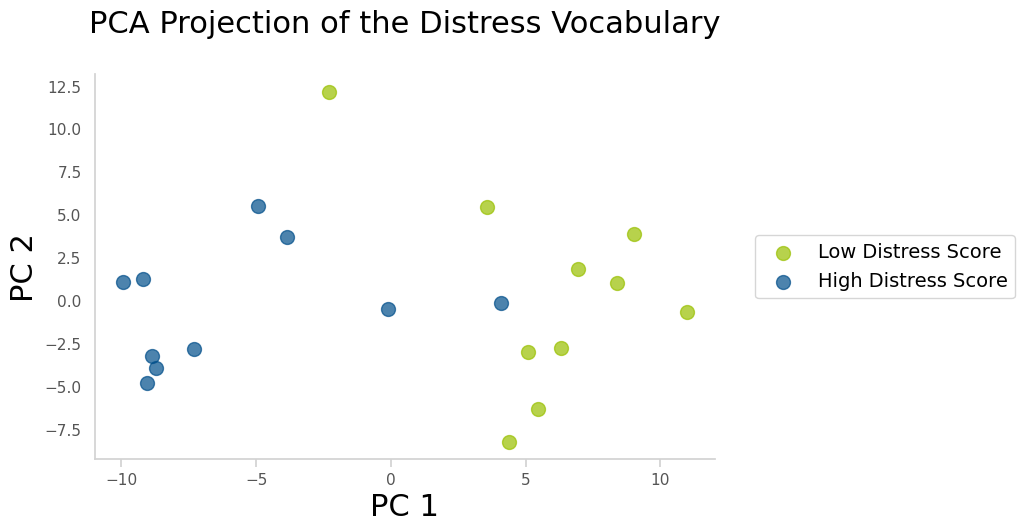

In [ ]:
# Empathy PC 1 and 2

random_y = np.array([random.uniform(0, 10) for y in range(len(vocab_dis['word']))])
print(random_y)
random_y = [5.39866097, 3.75544358, 4.52912977, 3.63039245, 1.13329465,
       3.91336996, 4.07494531, 8.26598285, 1.93580316, 5.40860681,
       7.65129481, 1.93552409, 6.97873003, 9.15086184, 4.29958708,
       8.74735676, 3.51188576, 3.48474621, 6.46794862, 6.25285159]
print(vocab_emp['word'])

direction = vocab_dis['ED/DD']
random_y = vocab_dis['PC2']
label = vocab_dis['label']
words = vocab_dis['word']
offset = 0.01

direction = np.array(direction)
random_y = np.array(random_y)
#label = label / 7

plt.figure(figsize=(8, 5))
z = np.array([0 if l<3.5 else 1 for l in label])
label_dict = {0: 'Low Distress Score', 1: 'High Distress Score'}
for g in np.unique(z):
       ix = np.where(z == g)
       sc = plt.scatter(direction[ix], random_y[ix], c=color_dict[g], alpha=0.7, vmin=0, vmax=1, s=100, label=label_dict[g]) #color=tu_c1)#
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5), prop={'size': 14})
plt.xlabel('PC 1')
plt.ylabel('PC 2')

#plt.yticks([])

plt.title('PCA Projection of the Distress Vocabulary', pad=30)
plt.savefig(f'{output_dir}/project_PC1_PC2_distress_.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)
#for i, word in enumerate(words):
#       plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))

## Plot for even subsampled data

In [ ]:
vocab_dis_big = pd.read_csv('../EmpDim/output/vocab_distress_756.csv', index_col=0)
vocab_emp_big = pd.read_csv('../EmpDim/output/vocab_empathy_791.csv', index_col=0)

In [ ]:
def plot_pca_no_words(x, y, labels, labelx, labely, title, filename, task_name, colormap_name='Blues'):

    cm = plt.cm.get_cmap(colormap_name)

    x = np.array(x)
    y = np.array(y)
    labels = labels / 7

    plt.figure(figsize=(8, 5))
    sc = plt.scatter(x, y, c=labels, alpha=0.7, vmin=0, vmax=1, s=30, cmap=cm) #color=tu_c1)#
    plt.xlabel(labelx)
    plt.ylabel(labely)

    #plt.yticks([])

    plt.title(title, pad=30)
    #for i, word in enumerate(words):
    #       plt.annotate(word, (direction[i]+0.4, random_y[i]+0.1))
    #cbar = plt.colorbar(ticks=[0, 0.25, 0.5, 0.75, 1])
    #cbar.set_ticklabels([1, 2.5, 4, 6.5, 7])
    cbar = plt.colorbar(ticks=[0, 0.166666, 0.3333, 0.5, 0.66, 0.83, 1])
    cbar.set_ticklabels([1, 2, 3, 4, 5, 6, 7])
    cbar.set_label(f'{task_name} Score')
    plt.savefig(f'{output_dir}/{filename}', bbox_inches='tight', dpi=plt.gcf().dpi)


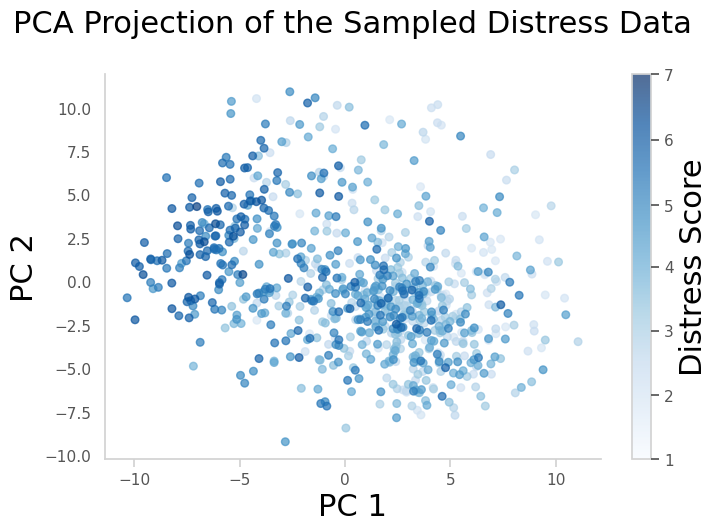

In [ ]:
x = vocab_dis_big['PC1']
y = vocab_dis_big['PC2']
labels = vocab_dis_big['label']
labelx = 'PC 1'
labely = 'PC 2'
title = 'PCA Projection of the Sampled Distress Data'
filename = 'project_PC1_PC2_distress_756.pdf'
plot_pca_no_words(x, y, labels, labelx, labely, title, filename, task_name='Distress', colormap_name='Blues')

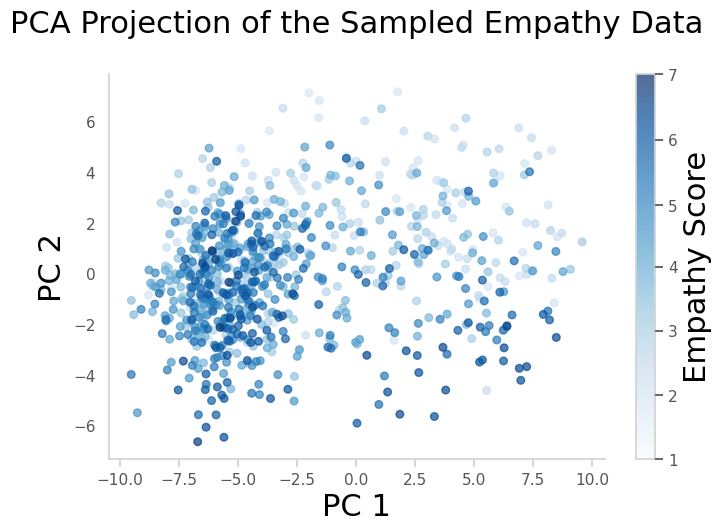

In [ ]:
x = vocab_emp_big['PC1']
y = vocab_emp_big['PC2']
labels = vocab_emp_big['label']
labelx = 'PC 1'
labely = 'PC 2'
title = 'PCA Projection of the Sampled Empathy Data'
filename = 'project_PC1_PC2_empathy_791.pdf'
plot_pca_no_words(x, y, labels, labelx, labely, title, filename, task_name='Empathy', colormap_name='Blues')